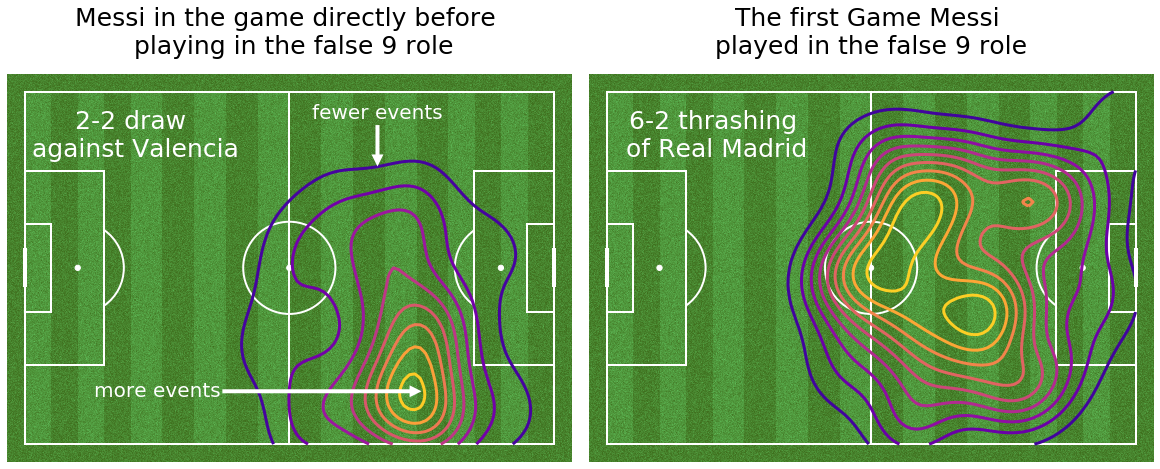

In [1]:
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import os

# load first game that Messi played as a false-9 and the match before
kwargs = {'related_event_df': False,'shot_freeze_frame_df': False, 'tactics_lineup_df': False}
df_false9 = read_event(os.path.join(EVENT_SLUG,'69249.json'), **kwargs)['event']
df_before_false9 = read_event(os.path.join(EVENT_SLUG,'69251.json'), **kwargs)['event']
# filter messi's actions (starting positions)
df_false9 = df_false9.loc[df_false9.player_id == 5503,['x', 'y']]
df_before_false9 = df_before_false9.loc[df_before_false9.player_id == 5503,['x', 'y']]
# plotting
pitch = Pitch(pitch_type = 'statsbomb', figsize = (16, 9), layout = (1, 2), pitch_color = 'grass', stripe = True)
fig, ax = pitch.draw()
ax[0].set_title('Messi in the game directly before \n playing in the false 9 role', fontsize = 25, pad = 20)
pitch.kdeplot(df_before_false9.x, df_before_false9.y, ax = ax[0], cmap = 'plasma', linewidths = 3)
pitch.annotate('6-2 thrashing \nof Real Madrid', (25,10), color = 'white',
               fontsize = 25, ha = 'center', va = 'center', ax = ax[1])
ax[1].set_title('The first Game Messi \nplayed in the false 9 role', fontsize = 25, pad = 20)
pitch.kdeplot(df_false9.x, df_false9.y, ax = ax[1], cmap = 'plasma', linewidths = 3)
pitch.annotate('2-2 draw \nagainst Valencia', (25,10), color = 'white',
               fontsize = 25, ha = 'center', va = 'center', ax = ax[0])
pitch.annotate('more events', (90,68), (30,68), ax=ax[0], color='white', ha = 'center', va = 'center',
               fontsize = 20, arrowprops=dict(facecolor='white', edgecolor = 'None'))
pitch.annotate('fewer events', (80,17), (80,5), ax=ax[0], color='white', ha = 'center', va = 'center',
               fontsize = 20, arrowprops=dict(facecolor='white', edgecolor = 'None'))
fig.savefig(os.path.join('figures', 'README_kdeplot_example.png'), bbox_inches = 'tight')